In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("./test.csv")
df2 = pd.read_csv("./train.csv")
df = pd.concat([df1,df2])



# Basic Knowledge of the Dataset




In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

1. There are 24 feature columns, and the target is the “satisfaction” column;
2. The features are all floats and ints except for "Gender", "Customer Type", "Type of Travel", and
"Class", as they are objects;
3. The target column, "satisfaction", is an object;


# Missing Value Analysis


In [10]:
np.sum(df.isna(),axis=0)


Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

The only column with missing values is “Arrival Delay in Minutes” column with 393 missing values (but later we will drop this column);

# Is the Dataset Balanced?

In [16]:
vc=df["satisfaction"].value_counts()
vc

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

Text(0, 0.5, 'Count')

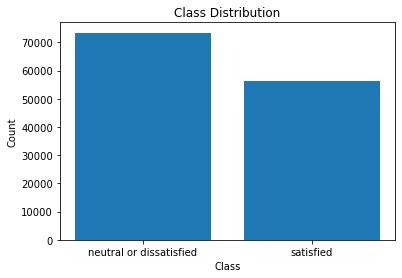

In [17]:
plt.bar(x=vc.index, height=vc.values)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")


We have an imbalanced dataset, since we have 73452 observations with class "neutral or
dissatisfied" and 56428 "satisfied" observations as shown in the figure above

# Correlation Analysis

In [13]:
df.corr()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,0.002199,0.000109,0.001160,-0.001320,0.002141,0.001388,0.003799,-0.004171,-0.000912,-0.001724,0.000485,0.000170,0.003046,-0.000626,-0.004747,-0.001990,-0.001083,0.002358,0.002099
id,0.002199,1.000000,0.020322,0.095504,-0.023096,-0.002192,0.013400,-0.000113,-0.000510,0.055538,0.052164,0.001620,0.055502,0.044088,0.074569,0.079325,0.078793,0.024048,-0.017643,-0.035657
Age,0.000109,0.020322,1.000000,0.099459,0.016116,0.036960,0.022565,-0.000398,0.023194,0.207572,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565,-0.009041,-0.011248
Flight Distance,0.001160,0.095504,0.099459,1.000000,0.006701,-0.018914,0.065165,0.005520,0.057066,0.214825,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648,0.002402,-0.001935
Inflight wifi service,-0.001320,-0.023096,0.016116,0.006701,1.000000,0.344915,0.714807,0.338573,0.132214,0.457445,0.121513,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300,-0.015946,-0.017749
Departure/Arrival time convenient,0.002141,-0.002192,0.036960,-0.018914,0.344915,1.000000,0.437620,0.447510,0.000687,0.072287,0.008666,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.000778,-0.000942
Ease of Online booking,0.001388,0.013400,0.022565,0.065165,0.714807,0.437620,1.000000,0.460041,0.030514,0.404866,0.028561,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,-0.005318,-0.007033
Gate location,0.003799,-0.000113,-0.000398,0.005520,0.338573,0.447510,0.460041,1.000000,-0.002872,0.002756,0.002788,0.002741,-0.029019,-0.005181,0.000972,-0.039353,0.000310,-0.005918,0.005973,0.005658
Food and drink,-0.004171,-0.000510,0.023194,0.057066,0.132214,0.000687,0.030514,-0.002872,1.000000,0.233500,0.575846,0.623461,0.057404,0.033173,0.035321,0.085198,0.035210,0.658054,-0.029164,-0.031715
Online boarding,-0.000912,0.055538,0.207572,0.214825,0.457445,0.072287,0.404866,0.002756,0.233500,1.000000,0.419253,0.283922,0.154242,0.123225,0.083541,0.204238,0.074058,0.329377,-0.019404,-0.022730


<AxesSubplot:>

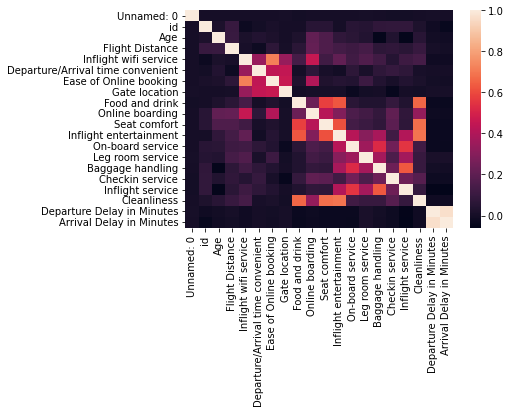

In [14]:
sns.heatmap(df.corr())

 For numeric features, if we set the threshold to be 0.90, then The only highly correlated columns are "Departure Delays in Minutes" and "Arrival Delay in Minutes" with coefficient 0.965,

# Categorical Features?

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


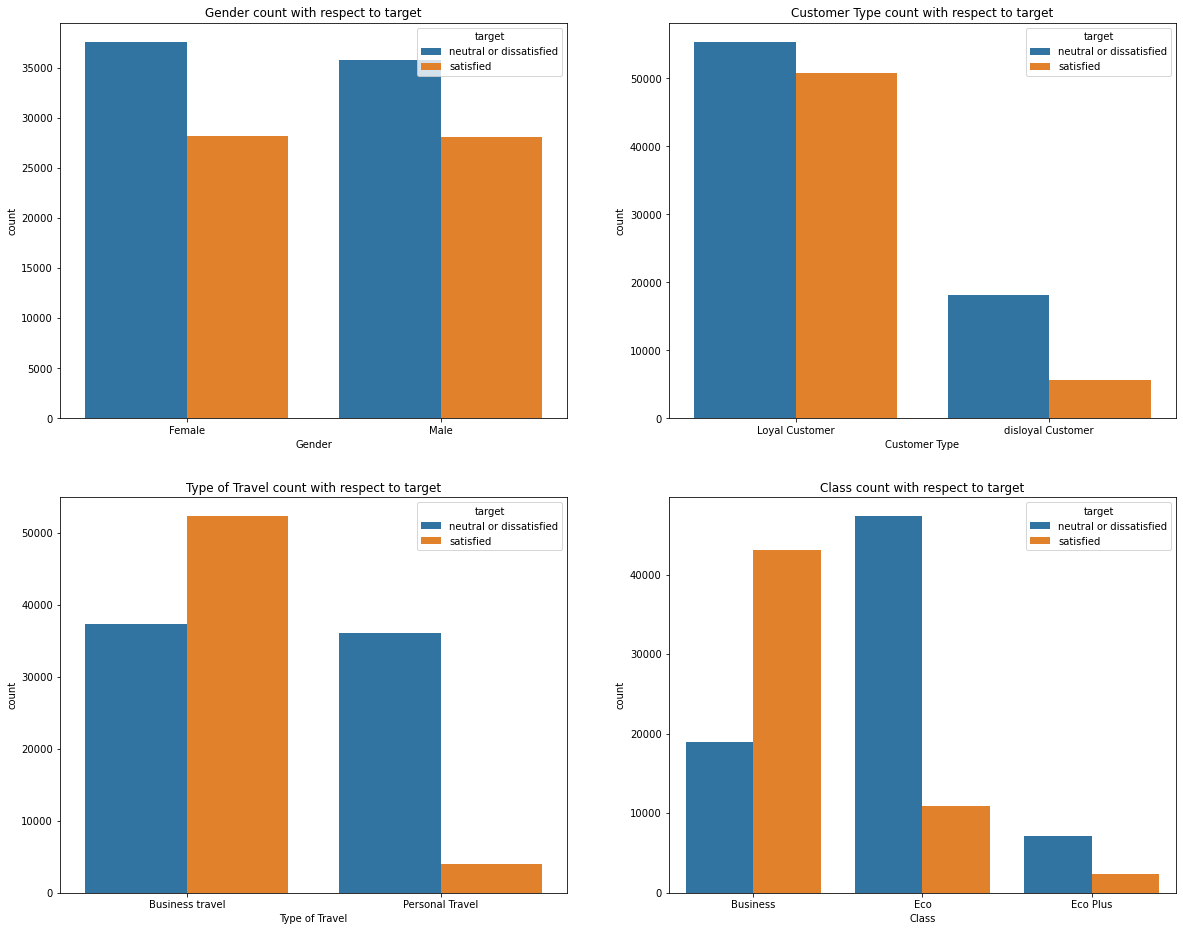

In [15]:
cat = ["Gender","Customer Type","Type of Travel","Class"]

fig,ax = plt.subplots(2,2,figsize=(20,16))
ax = ax.ravel()
print(ax)

for i in range(len(cat)):
    tempdf = df[[cat[i],"satisfaction"]].groupby(by=[cat[i],"satisfaction"]).size()
    tempdf = pd.DataFrame({"var":[i[0] for i in tempdf.index],"target":[i[1] for i in tempdf.index],"value":tempdf.values})
    sns.barplot(x=tempdf["var"],y=tempdf["value"],hue=tempdf["target"],ax=ax[i])
    ax[i].set_xlabel(cat[i])
    ax[i].set_ylabel("count")
    ax[i].set_title(cat[i]+" count with respect to target")

For Gender column, there are more female observations than male observations, and for both genders, there are more answers with 0 (neutral or dissatisfied) than answers with 1 (satisfied).</br>
For "Customer Type" column, there are considerably more observations with loyal customers than disloyal customers, and again, more observations are with answer 0.</br>
For "Type of Travel" column, more observations are made with business travel than personal travel, and for business travel, 1 answers outnumber 0 answers, but the opposite is true for personal travels.</br>
For Class column, eco plus is the class with least number of observations; the other two classes are with considerably more observations. For eco plus and eco classes, more 0 observations are made, and the opposite is true for business class.</br>